In [1]:
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
df = pd.read_csv("./data/brushing_data.csv")

In [2]:
#Sarakkeiden muunnokset oikeaan formaattiin
df["previousId"] = df["previousId"].astype(pd.Int64Dtype())
#Ajat
df["sendingTime"] = pd.to_datetime(df["sendingTime"])
df["endTime"] = pd.to_datetime(df["endTime"])
df["startTime"] = pd.to_datetime(df["startTime"])
df["created"] = pd.to_datetime(df["created"])

df["domain"] = df["domain"].astype(pd.StringDtype())
df["source"] = df["source"].astype(pd.StringDtype())
df["type"] = df["type"].astype(pd.StringDtype())

df.dtypes


id                           int64
previousId                   Int64
sendingTime    datetime64[ns, UTC]
created        datetime64[ns, UTC]
tasks                       object
startTime      datetime64[ns, UTC]
endTime        datetime64[ns, UTC]
direction                  float64
domain              string[python]
source              string[python]
type                string[python]
coordinates                 object
dtype: object

In [3]:
df.head(5)

,id,previousId,sendingTime,created,tasks,startTime,endTime,direction,domain,source,type,coordinates
0,97620071,<NA>,2024-03-12 07:21:51+00:00,2024-03-12 07:24:41+00:00,['BRUSHING'],2024-03-12 07:21:50+00:00,2024-03-12 07:23:52+00:00,NaN,state-roads,Harja/Väylävirasto,LineString,"[[23.316789, 60.383224, 0.0], [23.316183, 60.3..."
1,97620251,97620071,2024-03-12 07:23:53+00:00,2024-03-12 07:26:43+00:00,['BRUSHING'],2024-03-12 07:23:52+00:00,2024-03-12 07:26:00+00:00,NaN,state-roads,Harja/Väylävirasto,LineString,"[[23.317848, 60.386554, 0.0], [23.320868, 60.3..."
2,97620507,97620251,2024-03-12 07:26:01+00:00,2024-03-12 07:28:44+00:00,['BRUSHING'],2024-03-12 07:26:00+00:00,2024-03-12 07:28:45+00:00,NaN,state-roads,Harja/Väylävirasto,LineString,"[[23.321282, 60.389294, 0.0], [23.321706, 60.3..."
3,97620715,97620507,2024-03-12 07:28:46+00:00,2024-03-12 07:30:46+00:00,['BRUSHING'],2024-03-12 07:28:45+00:00,2024-03-12 07:31:45+00:00,NaN,state-roads,Harja/Väylävirasto,LineString,"[[23.323785, 60.392231, 0.0], [23.323774, 60.3..."
4,97621013,97620715,2024-03-12 07:31:46+00:00,2024-03-12 07:33:48+00:00,['BRUSHING'],2024-03-12 07:31:45+00:00,2024-03-12 07:34:21+00:00,NaN,state-roads,Harja/Väylävirasto,LineString,"[[23.324694, 60.39549, 0.0], [23.325216, 60.39..."


#### Harjaukseen käytetty aika päivän mukaan (osa json-tiedostoista ei sisällä yhtään reittiä)

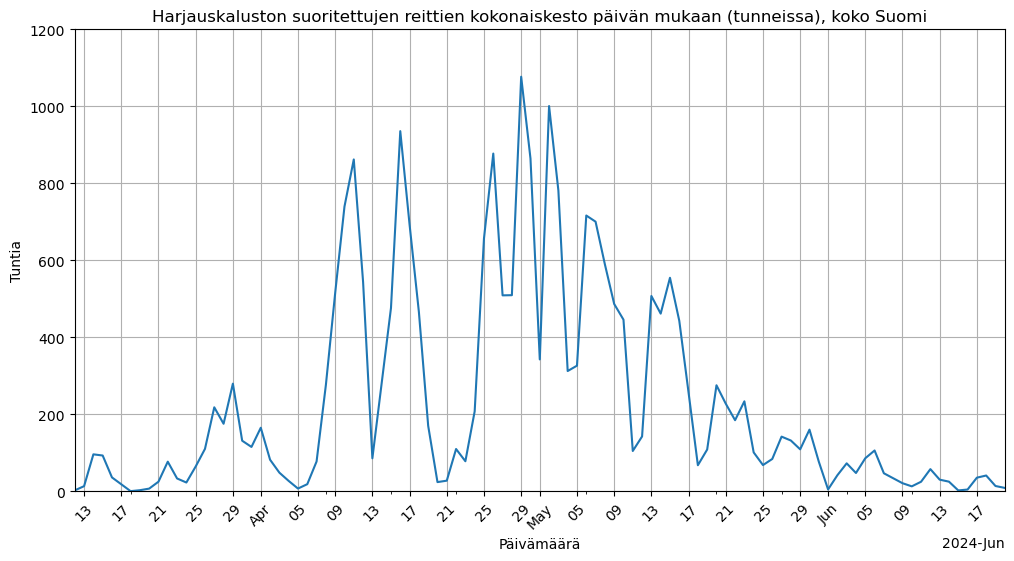

In [16]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
duration_hours = (df["endTime"] - df["startTime"]).dt.total_seconds() / 3600


duration_by_day = duration_hours.groupby(df['endTime'].dt.to_period('D')).sum()

plt.figure(figsize=(12, 6))
duration_by_day.plot(title="Harjauskaluston suoritettujen reittien kokonaiskesto päivän mukaan (tunneissa), koko Suomi")
plt.ylim(0, 1200)
plt.ylabel("Tuntia")
plt.xlabel("Päivämäärä")
plt.grid()


ax = plt.gca()


locator = mdates.AutoDateLocator(minticks=20, maxticks=40)
formatter = mdates.ConciseDateFormatter(locator)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

plt.xticks(rotation=45) 

plt.show()

In [5]:
#Reitin keskimääräinen kesto
from statistics import median
from datetime import datetime, timedelta

print(f"Käytetty aika yhteensä: {(df['endTime']-df['startTime']).sum()}")
df["spentTime"] = df['endTime'] - df['startTime']
print(f"Yhden reitin keskimääräinen kesto: {df['spentTime'].mean()}")
print(f"Yhden reitin mediaani kesto: {df['spentTime'].median()}")

Käytetty aika yhteensä: 978 days 12:45:28
Yhden reitin keskimääräinen kesto: 0 days 00:01:23.206911246
Yhden reitin mediaani kesto: 0 days 00:01:03


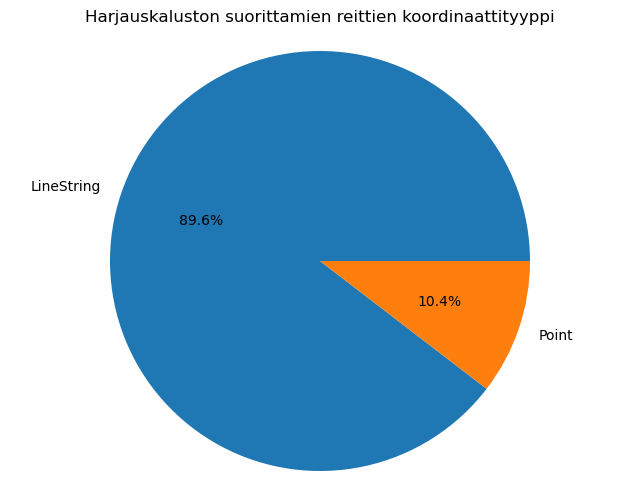

In [6]:
# Pistemäisen ja vektoridatan määrä
# df["type"].value_counts().plot(kind="pie", title="Harjauskaluston suorittamien reittien koordinaattityyppi", legend=True)
# print(df["type"].value_counts())

type_counts = df["type"].value_counts()

plt.figure(figsize=(8,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%')
plt.title("Harjauskaluston suorittamien reittien koordinaattityyppi")
plt.axis('equal')
plt.show()


In [7]:
# Vektoridatan pisteiden mediaani
vectors = df["coordinates"].loc[df['type'] == "LineString"]
lengths = []

for i in vectors:
  lengths.append(len(eval(i)))

print(f"Vektoridatan pisteitä keskimäärin: {sum(lengths) / len(lengths)}")
print(f"Vektoridatan pisteiden mediaanimäärä: {median(lengths)}")
print(f"Vektoridatan pisteiden maksimimäärä: {max(lengths)}")
print(f"Vektoridatan pisteiden minimimäärä: {min(lengths)}")

Vektoridatan pisteitä keskimäärin: 3.89606809774769
Vektoridatan pisteiden mediaanimäärä: 3
Vektoridatan pisteiden maksimimäärä: 77
Vektoridatan pisteiden minimimäärä: 2


In [8]:
#Tehtävänimikkeiden määrä
print(df["tasks"].value_counts())

tasks
['BRUSHING']                                                                                                            983034
['BRUSHING', 'CLEANSING_OF_BRIDGES']                                                                                     18883
['CLEANSING_OF_BRIDGES', 'BRUSHING']                                                                                     11053
['OTHER', 'BRUSHING']                                                                                                      992
['BRUSHING', 'OTHER']                                                                                                      862
['DUST_BINDING_OF_GRAVEL_ROAD_SURFACE', 'BRUSHING']                                                                        803
['BRUSHING', 'FILLING_OF_GRAVEL_ROAD_SHOULDERS']                                                                            73
['BRUSHING', 'LEVELLING_OF_ROAD_SHOULDERS']                                                              

In [9]:
#Lähteiden määrä
print(df["source"].value_counts())

source
Harja/Väylävirasto    1016083
Name: count, dtype: Int64


In [10]:
#Domainien määrä
print(df["domain"].value_counts())

domain
state-roads    1016083
Name: count, dtype: Int64
